In [1]:
# https://www.kaggle.com/shayanfazeli/heartbeat   # data set 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt # plotting
import os
import sklearn
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization, AveragePooling2D
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import scipy
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate

Using TensorFlow backend.


In [3]:
# reading csv file  

test=pd.read_csv("mitbih_test.csv",header=None) 
train=pd.read_csv("mitbih_train.csv",header=None) 
#Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
# N- normal, S-supraventricular, V-ventricular, F-fusion, Q- unknown

#print("Type\tCount")
#print((train[187]).value_counts())

print('Count of all classes in trainining dataset')
print("Type\tCount")
print((train[187]).value_counts())

print('*************************************')

print('Count of all classes in trainining dataset')
print("Type\tCount")
print((test[187]).value_counts())

Count of all classes in trainining dataset
Type	Count
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64
*************************************
Count of all classes in trainining dataset
Type	Count
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64


In [4]:
print("train shape : ",train.shape)
print("test shape : ",test.shape)

feature_train=train.iloc[:,0:187] 
print("feature_train shape : ",feature_train.shape)

labels_train=train.iloc[:,187] 
print("labels_train shape : ",labels_train.shape)

feature_test=test.iloc[:,0:187] 
print("feature_test shape : ",feature_test.shape)

labels_test=test.iloc[:,187] 
print("labels_test shape : ",labels_test.shape)
      


train shape :  (87554, 188)
test shape :  (21892, 188)
feature_train shape :  (87554, 187)
labels_train shape :  (87554,)
feature_test shape :  (21892, 187)
labels_test shape :  (21892,)


In [5]:
from sklearn.preprocessing import StandardScaler
standardized_training_data=StandardScaler().fit_transform(feature_train)
feature_train=standardized_training_data

standardized_test_data=StandardScaler().fit_transform(feature_test)
feature_test=standardized_test_data

In [7]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
#from keras.initializers import glorot_normal

In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [9]:
# here we are having a class number for each image
print("Class label of first image :", labels_train[83456])

Y_train = np_utils.to_categorical(labels_train)
print("After converting the output into a vector : ",Y_train[83456])

Y_test = np_utils.to_categorical(labels_test)

Class label of first image : 4.0
After converting the output into a vector :  [0. 0. 0. 0. 1.]


In [10]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 

output_dim = 5
input_dim = feature_train.shape[1]

#batch_size = 128 
#nb_epoch = 20

batch_size = 512
nb_epoch = 500

In [11]:
print("feature_train",feature_train.shape)
print("Y_train",Y_train)
print("feature_test",feature_test.shape)
print("Y_test",Y_test.shape)

feature_train (87554, 187)
Y_train [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]
feature_test (21892, 187)
Y_test (21892, 5)


In [16]:
# 1. Softmax classifier



# start building a model
model = Sequential()

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

model.summary()

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(feature_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(feature_test, Y_test)) 


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 940       
Total params: 940
Trainable params: 940
Non-trainable params: 0
_________________________________________________________________
Train on 87554 samples, validate on 21892 samples
Epoch 1/500
87554/87554 [==============================] - 2s 20us/step - loss: 1.2311 - accuracy: 0.6245 - val_loss: 0.9170 - val_accuracy: 0.7749
Epoch 2/500
87554/87554 [==============================] - 1s 16us/step - loss: 0.7632 - accuracy: 0.8209 - val_loss: 0.6555 - val_accuracy: 0.8457
Epoch 3/500
87554/87554 [==============================] - 1s 17us/step - loss: 0.5855 - accuracy: 0.8681 - val_loss: 0.5353 - val_accuracy: 0.8785
Epoch 4/500
87554/87554 [==============================] - 1s 16us/step - loss: 0.5015 - accuracy: 0.8819 - val_loss: 0.4773 - val_accuracy: 0.8827
Epoch 5/

87554/87554 [==============================] - 2s 21us/step - loss: 0.3177 - accuracy: 0.9047 - val_loss: 0.3258 - val_accuracy: 0.9028
Epoch 53/500
87554/87554 [==============================] - 1s 16us/step - loss: 0.3171 - accuracy: 0.9042 - val_loss: 0.3255 - val_accuracy: 0.9041
Epoch 54/500
87554/87554 [==============================] - 2s 18us/step - loss: 0.3167 - accuracy: 0.9042 - val_loss: 0.4536 - val_accuracy: 0.8777
Epoch 55/500
87554/87554 [==============================] - 2s 20us/step - loss: 0.3209 - accuracy: 0.9016 - val_loss: 0.3265 - val_accuracy: 0.9046
Epoch 56/500
87554/87554 [==============================] - 1s 16us/step - loss: 0.3162 - accuracy: 0.9049 - val_loss: 0.3672 - val_accuracy: 0.8858
Epoch 57/500
87554/87554 [==============================] - 2s 21us/step - loss: 0.3169 - accuracy: 0.9037 - val_loss: 0.3246 - val_accuracy: 0.9036
Epoch 58/500
87554/87554 [==============================] - 2s 21us/step - loss: 0.3152 - accuracy: 0.9049 - val_loss: 

87554/87554 [==============================] - 1s 16us/step - loss: 0.3047 - accuracy: 0.9084 - val_loss: 0.3153 - val_accuracy: 0.9075
Epoch 108/500
87554/87554 [==============================] - 1s 17us/step - loss: 0.3046 - accuracy: 0.9087 - val_loss: 0.3150 - val_accuracy: 0.9069
Epoch 109/500
87554/87554 [==============================] - 1s 15us/step - loss: 0.3044 - accuracy: 0.9084 - val_loss: 0.3151 - val_accuracy: 0.9064
Epoch 110/500
87554/87554 [==============================] - 1s 15us/step - loss: 0.3043 - accuracy: 0.9086 - val_loss: 0.3149 - val_accuracy: 0.9064
Epoch 111/500
87554/87554 [==============================] - 1s 17us/step - loss: 0.3042 - accuracy: 0.9084 - val_loss: 0.3150 - val_accuracy: 0.9070
Epoch 112/500
87554/87554 [==============================] - 1s 16us/step - loss: 0.3040 - accuracy: 0.9089 - val_loss: 0.3152 - val_accuracy: 0.9057
Epoch 113/500
87554/87554 [==============================] - 1s 16us/step - loss: 0.3039 - accuracy: 0.9085 - val_

Epoch 162/500
87554/87554 [==============================] - 2s 19us/step - loss: 0.2992 - accuracy: 0.9106 - val_loss: 0.3133 - val_accuracy: 0.9079
Epoch 163/500
87554/87554 [==============================] - 2s 19us/step - loss: 0.2997 - accuracy: 0.9104 - val_loss: 0.3118 - val_accuracy: 0.9069
Epoch 164/500
87554/87554 [==============================] - 2s 18us/step - loss: 0.2992 - accuracy: 0.9101 - val_loss: 0.3110 - val_accuracy: 0.9083
Epoch 165/500
87554/87554 [==============================] - 1s 16us/step - loss: 0.2991 - accuracy: 0.9103 - val_loss: 0.3114 - val_accuracy: 0.9100
Epoch 166/500
87554/87554 [==============================] - 1s 16us/step - loss: 0.2990 - accuracy: 0.9112 - val_loss: 0.3106 - val_accuracy: 0.9087
Epoch 167/500
87554/87554 [==============================] - 1s 15us/step - loss: 0.2988 - accuracy: 0.9106 - val_loss: 0.3108 - val_accuracy: 0.9089
Epoch 168/500
87554/87554 [==============================] - 1s 15us/step - loss: 0.2988 - accuracy:

87554/87554 [==============================] - 1s 13us/step - loss: 0.2960 - accuracy: 0.9119 - val_loss: 0.3084 - val_accuracy: 0.9093
Epoch 217/500
87554/87554 [==============================] - 1s 12us/step - loss: 0.2960 - accuracy: 0.9114 - val_loss: 0.3110 - val_accuracy: 0.9093
Epoch 218/500
87554/87554 [==============================] - 1s 11us/step - loss: 0.2962 - accuracy: 0.9119 - val_loss: 0.3121 - val_accuracy: 0.9061
Epoch 219/500
87554/87554 [==============================] - 1s 11us/step - loss: 0.2963 - accuracy: 0.9113 - val_loss: 0.3083 - val_accuracy: 0.9103
Epoch 220/500
87554/87554 [==============================] - 1s 11us/step - loss: 0.2959 - accuracy: 0.9122 - val_loss: 0.3082 - val_accuracy: 0.9098
Epoch 221/500
87554/87554 [==============================] - 1s 11us/step - loss: 0.2958 - accuracy: 0.9115 - val_loss: 0.3081 - val_accuracy: 0.9102
Epoch 222/500
87554/87554 [==============================] - 1s 11us/step - loss: 0.2958 - accuracy: 0.9119 - val_

Epoch 271/500
87554/87554 [==============================] - 1s 11us/step - loss: 0.2951 - accuracy: 0.9122 - val_loss: 0.3067 - val_accuracy: 0.9105
Epoch 272/500
87554/87554 [==============================] - 1s 11us/step - loss: 0.2939 - accuracy: 0.9126 - val_loss: 0.3066 - val_accuracy: 0.9110
Epoch 273/500
87554/87554 [==============================] - 1s 11us/step - loss: 0.2938 - accuracy: 0.9124 - val_loss: 0.3088 - val_accuracy: 0.9092
Epoch 274/500
87554/87554 [==============================] - 1s 11us/step - loss: 0.2942 - accuracy: 0.9118 - val_loss: 0.3083 - val_accuracy: 0.9123
Epoch 275/500
87554/87554 [==============================] - 1s 11us/step - loss: 0.2939 - accuracy: 0.9127 - val_loss: 0.3069 - val_accuracy: 0.9119
Epoch 276/500
87554/87554 [==============================] - 1s 11us/step - loss: 0.2937 - accuracy: 0.9129 - val_loss: 0.3069 - val_accuracy: 0.9112
Epoch 277/500
87554/87554 [==============================] - 1s 11us/step - loss: 0.2937 - accuracy:

87554/87554 [==============================] - 1s 15us/step - loss: 0.2922 - accuracy: 0.9126 - val_loss: 0.3051 - val_accuracy: 0.9114
Epoch 326/500
87554/87554 [==============================] - 1s 12us/step - loss: 0.2922 - accuracy: 0.9130 - val_loss: 0.3052 - val_accuracy: 0.9114
Epoch 327/500
87554/87554 [==============================] - 1s 12us/step - loss: 0.2922 - accuracy: 0.9131 - val_loss: 0.3049 - val_accuracy: 0.9116
Epoch 328/500
87554/87554 [==============================] - 1s 12us/step - loss: 0.2922 - accuracy: 0.9130 - val_loss: 0.4020 - val_accuracy: 0.8896
Epoch 329/500
87554/87554 [==============================] - 1s 11us/step - loss: 0.2961 - accuracy: 0.9140 - val_loss: 0.3053 - val_accuracy: 0.9123
Epoch 330/500
87554/87554 [==============================] - 1s 13us/step - loss: 0.2922 - accuracy: 0.9139 - val_loss: 0.3049 - val_accuracy: 0.9112
Epoch 331/500
87554/87554 [==============================] - 1s 12us/step - loss: 0.2921 - accuracy: 0.9131 - val_

87554/87554 [==============================] - 1s 7us/step - loss: 0.2923 - accuracy: 0.9116 - val_loss: 0.3042 - val_accuracy: 0.9115
Epoch 380/500
87554/87554 [==============================] - 1s 7us/step - loss: 0.2912 - accuracy: 0.9131 - val_loss: 0.3042 - val_accuracy: 0.9119
Epoch 381/500
87554/87554 [==============================] - 1s 7us/step - loss: 0.2910 - accuracy: 0.9134 - val_loss: 0.3042 - val_accuracy: 0.9132
Epoch 382/500
87554/87554 [==============================] - 1s 7us/step - loss: 0.2910 - accuracy: 0.9143 - val_loss: 0.3312 - val_accuracy: 0.8972
Epoch 383/500
87554/87554 [==============================] - 1s 7us/step - loss: 0.2920 - accuracy: 0.9137 - val_loss: 0.3044 - val_accuracy: 0.9129
Epoch 384/500
87554/87554 [==============================] - 1s 10us/step - loss: 0.2910 - accuracy: 0.9141 - val_loss: 0.3040 - val_accuracy: 0.9123
Epoch 385/500
87554/87554 [==============================] - 1s 9us/step - loss: 0.2909 - accuracy: 0.9136 - val_loss: 

87554/87554 [==============================] - 1s 7us/step - loss: 0.2901 - accuracy: 0.9141 - val_loss: 0.3034 - val_accuracy: 0.9127
Epoch 435/500
87554/87554 [==============================] - 1s 7us/step - loss: 0.2901 - accuracy: 0.9141 - val_loss: 0.3125 - val_accuracy: 0.9112
Epoch 436/500
87554/87554 [==============================] - 1s 7us/step - loss: 0.2907 - accuracy: 0.9139 - val_loss: 0.3035 - val_accuracy: 0.9133
Epoch 437/500
87554/87554 [==============================] - 1s 7us/step - loss: 0.2900 - accuracy: 0.9142 - val_loss: 0.3032 - val_accuracy: 0.9125
Epoch 438/500
87554/87554 [==============================] - 1s 7us/step - loss: 0.2899 - accuracy: 0.9139 - val_loss: 0.3033 - val_accuracy: 0.9125
Epoch 439/500
87554/87554 [==============================] - 1s 7us/step - loss: 0.2900 - accuracy: 0.9140 - val_loss: 0.3033 - val_accuracy: 0.9126
Epoch 440/500
87554/87554 [==============================] - 1s 7us/step - loss: 0.2899 - accuracy: 0.9140 - val_loss: 0

87554/87554 [==============================] - 1s 8us/step - loss: 0.2918 - accuracy: 0.9140 - val_loss: 0.3032 - val_accuracy: 0.9128
Epoch 490/500
87554/87554 [==============================] - 1s 8us/step - loss: 0.2893 - accuracy: 0.9143 - val_loss: 0.3028 - val_accuracy: 0.9126
Epoch 491/500
87554/87554 [==============================] - 1s 8us/step - loss: 0.2892 - accuracy: 0.9140 - val_loss: 0.3028 - val_accuracy: 0.9126
Epoch 492/500
87554/87554 [==============================] - 1s 8us/step - loss: 0.2891 - accuracy: 0.9142 - val_loss: 0.3027 - val_accuracy: 0.9124
Epoch 493/500
87554/87554 [==============================] - 1s 8us/step - loss: 0.2891 - accuracy: 0.9139 - val_loss: 0.3340 - val_accuracy: 0.9099
Epoch 494/500
87554/87554 [==============================] - 1s 8us/step - loss: 0.2904 - accuracy: 0.9144 - val_loss: 0.3026 - val_accuracy: 0.9126
Epoch 495/500
87554/87554 [==============================] - 1s 7us/step - loss: 0.2891 - accuracy: 0.9140 - val_loss: 0

In [17]:
y_pred = model.predict(feature_test, batch_size=512)
print(classification_report(Y_test.argmax(axis=1), y_pred.argmax(axis=1)))



              precision    recall  f1-score   support

           0       0.92      0.98      0.95     18118
           1       0.83      0.39      0.53       556
           2       0.61      0.36      0.46      1448
           3       0.66      0.22      0.33       162
           4       0.97      0.87      0.92      1608

    accuracy                           0.91     21892
   macro avg       0.80      0.56      0.64     21892
weighted avg       0.90      0.91      0.90     21892



Test score: 0.30287555285395773
Test accuracy: 0.9120683073997498


<IPython.core.display.Javascript object>


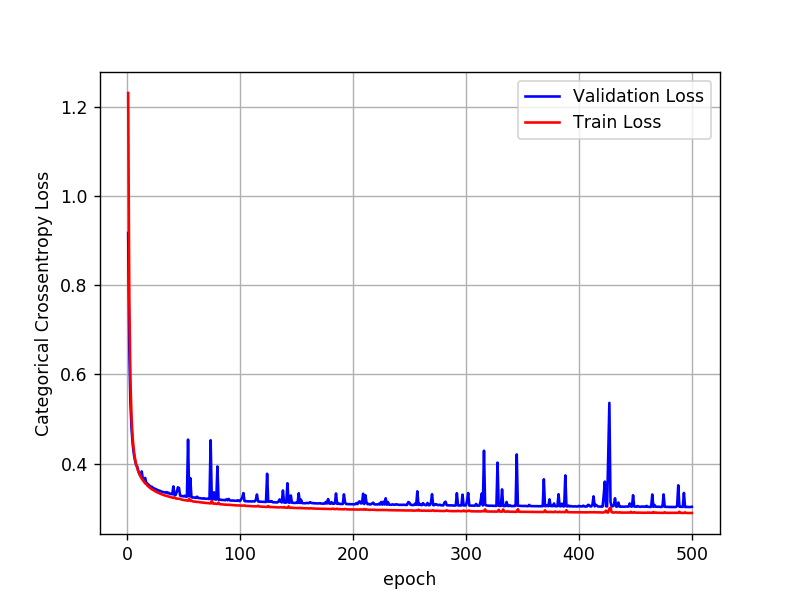

In [18]:
score = model.evaluate(feature_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)